## Part 1 - Data Cleaning / Data Exploration

In [3]:
# Import necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Load 1 million rows from the csv file
train=pd.read_csv("train.csv",nrows=1000000)

# Taking a look at the data
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# # Count number of such instances with 0 passenger counts
no_passenger_rides = train[train['passenger_count']==0]
len(no_passenger_rides)

3565

In [5]:
# Get rows with negative fare amount
negative_fare_rides = train[train['fare_amount']<0]

# Convert negative fare amount to positive fare amount 
train['fare_amount'] = train['fare_amount'].apply(lambda x: abs(x))

# Check the fares
negative_fare_rides = train[train['fare_amount']<0]

In [6]:
# Drop rows with atleast 1 nan value
train.dropna(inplace=True)
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.348417,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821253,12.057778,7.626087,11.324494,8.201418,1.323907
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [7]:
# Calculates distance from geographic coordinates
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [8]:
train['distance_miles']=distance(train.pickup_latitude,train.pickup_longitude,train.dropoff_latitude,train.dropoff_longitude)

In [52]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


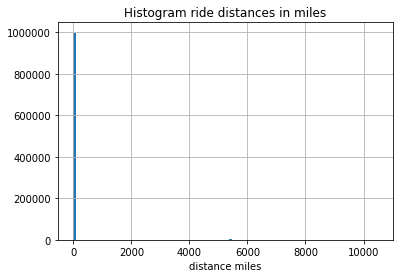

In [30]:
train.distance_miles.hist(bins=100)
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
plt.show()

Distance histogram for less than 50 miles

In [31]:
less_than_1000=train[train['distance_miles']<50]

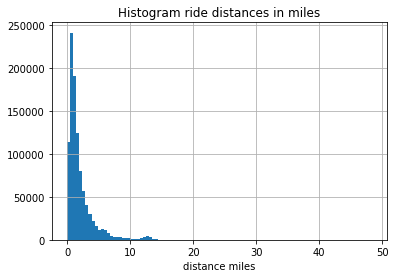

In [32]:
less_than_1000.distance_miles.hist(bins=100)
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
plt.show()

In [53]:
# Returns weekday for the given date
from dateutil import parser
def weekday(dates):
    days=[]
    d={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    for i in dates:
        days.append(d[parser.parse(i).strftime("%A")])
    return days
    

In [ ]:
train['pickup_weekday']=weekday(train.pickup_datetime)

In [ ]:
# Returns hour of the day for the given date
def hour(dates):
    hours=[]
    for i in dates:
        hours.append(parser.parse(str(i)).hour)
    return hours

In [ ]:
parser.parse('2009-06-15 17:26:21 UTC').hour

In [ ]:
pick_up_hours=hour(train.pickup_datetime)

In [ ]:
train['pick_up_hour']=pick_up_hours

In [ ]:
train.head()

## Part 2 - Linear Regression

In [9]:
# import necessary python libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
X=train[['distance_miles']]
y=train['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Train the model
lm = LinearRegression()
lm.fit(X_train, y_train)
print('The linear regression coefficient is %0.3f and the intercept is %0.3f' %(lm.coef_, lm.intercept_))

The linear regression coefficient is 0.001 and the intercept is 11.328


In [23]:
# Determine the MSE for training data
y_pred = lm.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
print("Mean Squared Error for training data: %0.3f" %(mse_train))

Mean Squared Error for training data: 96.319


In [22]:
# Determine the MSE for testing data
y_pred_test = lm.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for testing data: %0.3f" %(mse_test))

Mean Squared Error for testing data: 96.711


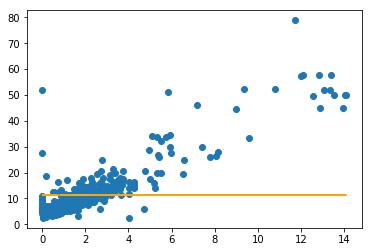

In [24]:
plt.scatter(X_train[0:500],y_train[0:500])
plt.plot(X_train[0:500],y_pred[0:500],color='orange')
plt.show()